### Prediksi GDP Europe Selama 5 tahun  ke depan

1. Import library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


2. Baca data frame

In [ ]:
df = pd.read_csv('Europe_GDP.csv')
print(df.head())

   Year       Austria       Belgium       Denmark       Finland        France  \
0  1960  6.650134e+09  1.181062e+10  6.361166e+09  5.279011e+09  6.222548e+10   
1  1961  7.375455e+09  1.256170e+10  7.058361e+09  5.983900e+09  6.746164e+10   
2  1962  7.823687e+09  1.343683e+10  7.953274e+09  6.407225e+09  7.560753e+10   
3  1963  8.447137e+09  1.444581e+10  8.466045e+09  6.958296e+09  8.475920e+10   
4  1964  9.249879e+09  1.616804e+10  9.677401e+09  7.848288e+09  9.400785e+10   

        Germany        Greece      Iceland       Ireland         Italy  \
0  8.431095e+10  4.335192e+09  252169712.0  1.998550e+09  4.191581e+10   
1  9.620573e+10  4.961399e+09  257703244.6  2.151773e+09  4.654222e+10   
2  1.055090e+11  5.213043e+09  289200704.4  2.329373e+09  5.229335e+10   
3  1.118230e+11  5.895281e+09  345175036.1  2.505073e+09  5.989787e+10   
4  1.228800e+11  6.669670e+09  440797869.3  2.851092e+09  6.556965e+10   

    Luxembourg   Netherlands        Norway      Portugal         Spa

3. Cek apakah ada yang null

In [ ]:
print(df.isnull().sum())


Year              0
Austria           0
Belgium           0
Denmark           0
Finland           0
France            0
Germany           0
Greece            0
Iceland           0
Ireland           0
Italy             0
Luxembourg        0
Netherlands       0
Norway            0
Portugal          0
Spain             0
Sweden            0
Switzerland       0
United Kingdom    0
dtype: int64


4. Pastikan kolom tahun bernilai int

In [ ]:
df['Year'] = df['Year'].astype(int)


5. Visualisasi data

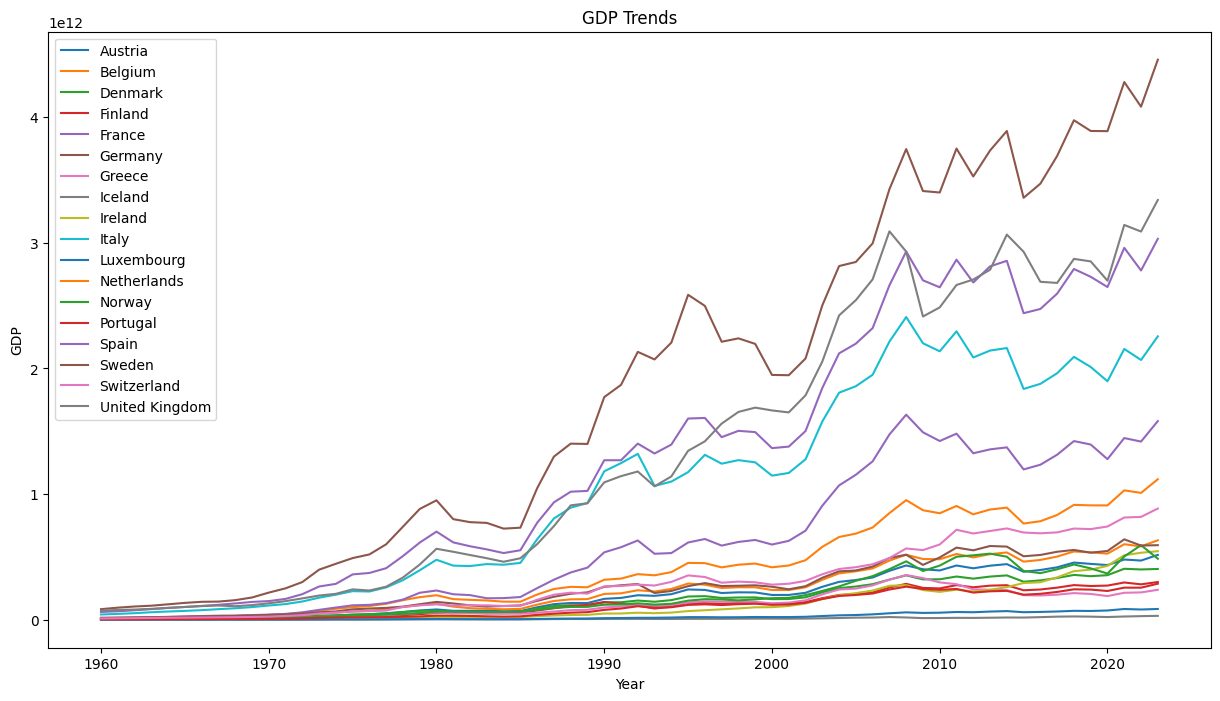

In [ ]:
plt.figure(figsize=(15, 8))
for country in df.columns[1:]:
    plt.plot(df['Year'], df[country], label=country)
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Trends')
plt.show()


6. Buat tahun target prediksi

In [ ]:
future_years = [2024, 2025, 2026, 2027, 2028]


7. Gunakan kolom years sebagai kolom utama

In [ ]:
X = df[['Year']]


8. Bagi data latih dan tes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df.drop(columns='Year'), test_size=0.2, random_state=42)


9. Pilih Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)



10. Evaluasi

In [ ]:
print('Linear regression')
print('MSE:', mean_squared_error(y_test, predictions))
print('R2 Score:', r2_score(y_test, predictions))

print('Random Forest')
print('MSE:', mean_squared_error(y_test, predictions_rf))
print('R2 Score:', r2_score(y_test, predictions_rf))

Linear regression
MSE: 1.8446101777895345e+22
R2 Score: 0.9177544854978711
Random Forest
MSE: 3.7216654068980845e+21
R2 Score: 0.9891516569481227


11. Prediksi

In [ ]:
future_predictions = model.predict(pd.DataFrame({'Year': future_years}))
print(future_predictions)


[[4.79411834e+11 5.78204170e+11 3.86277506e+11 2.98525757e+11
  3.09464721e+12 4.28901760e+12 2.86328228e+11 2.26212847e+10
  3.50598147e+11 2.44380898e+12 6.87784827e+10 1.00145943e+12
  4.78699115e+11 2.68631208e+11 1.55869753e+12 5.96845816e+11
  7.51362618e+11 3.24956403e+12]
 [4.88119119e+11 5.88549121e+11 3.93208128e+11 3.03853282e+11
  3.14880459e+12 4.36380961e+12 2.91347727e+11 2.30473264e+10
  3.57703206e+11 2.48628889e+12 7.01319010e+10 1.01962882e+12
  4.87753717e+11 2.73606592e+11 1.58744586e+12 6.07258695e+11
  7.65178665e+11 3.30836197e+12]
 [4.96826404e+11 5.98894072e+11 4.00138749e+11 3.09180808e+11
  3.20296197e+12 4.43860161e+12 2.96367226e+11 2.34733681e+10
  3.64808265e+11 2.52876880e+12 7.14853194e+10 1.03779821e+12
  4.96808320e+11 2.78581975e+11 1.61619419e+12 6.17671574e+11
  7.78994712e+11 3.36715990e+12]
 [5.05533689e+11 6.09239023e+11 4.07069371e+11 3.14508334e+11
  3.25711934e+12 4.51339361e+12 3.01386725e+11 2.38994098e+10
  3.71913323e+11 2.57124872e+12 7

12. Visualisasi hasil prediksi


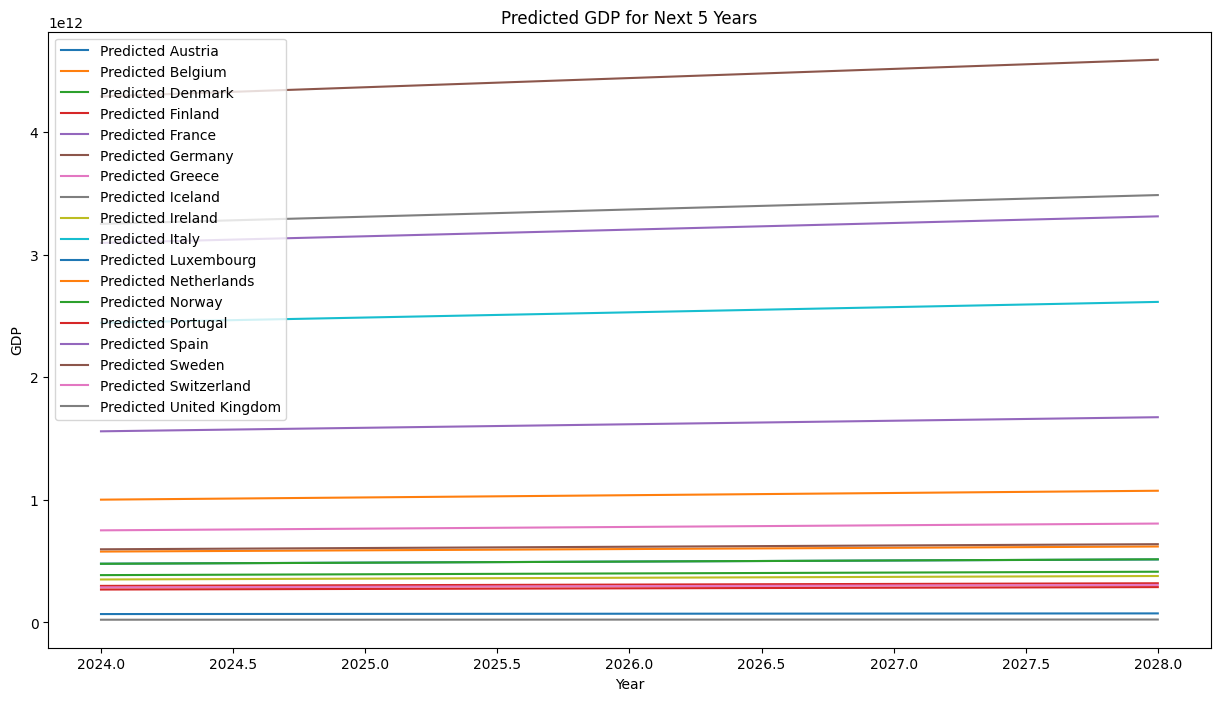

In [ ]:
plt.figure(figsize=(15, 8))
for i, country in enumerate(df.columns[1:]):
    plt.plot(future_years, future_predictions[:, i], label=f'Predicted {country}')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Predicted GDP for Next 5 Years')
plt.show()


13. Analisis dan Kesimpulan

In [ ]:
future_df = pd.DataFrame(future_predictions, columns=df.columns[1:], index=future_years)
future_df.to_csv('predicted_gdp.csv')


Hasil Gabungan

In [ ]:
# 1. Gabungkan data historis dengan prediksi
historical_data = df.copy()  # Data sebelumnya
future_data = pd.DataFrame({'Year': future_years})  # Tahun masa depan
future_gdp = pd.DataFrame(future_predictions, columns=df.columns[1:])
future_data = pd.concat([future_data, future_gdp], axis=1)

# Gabungkan data historis dengan data prediksi
combined_data = pd.concat([historical_data, future_data], ignore_index=True)


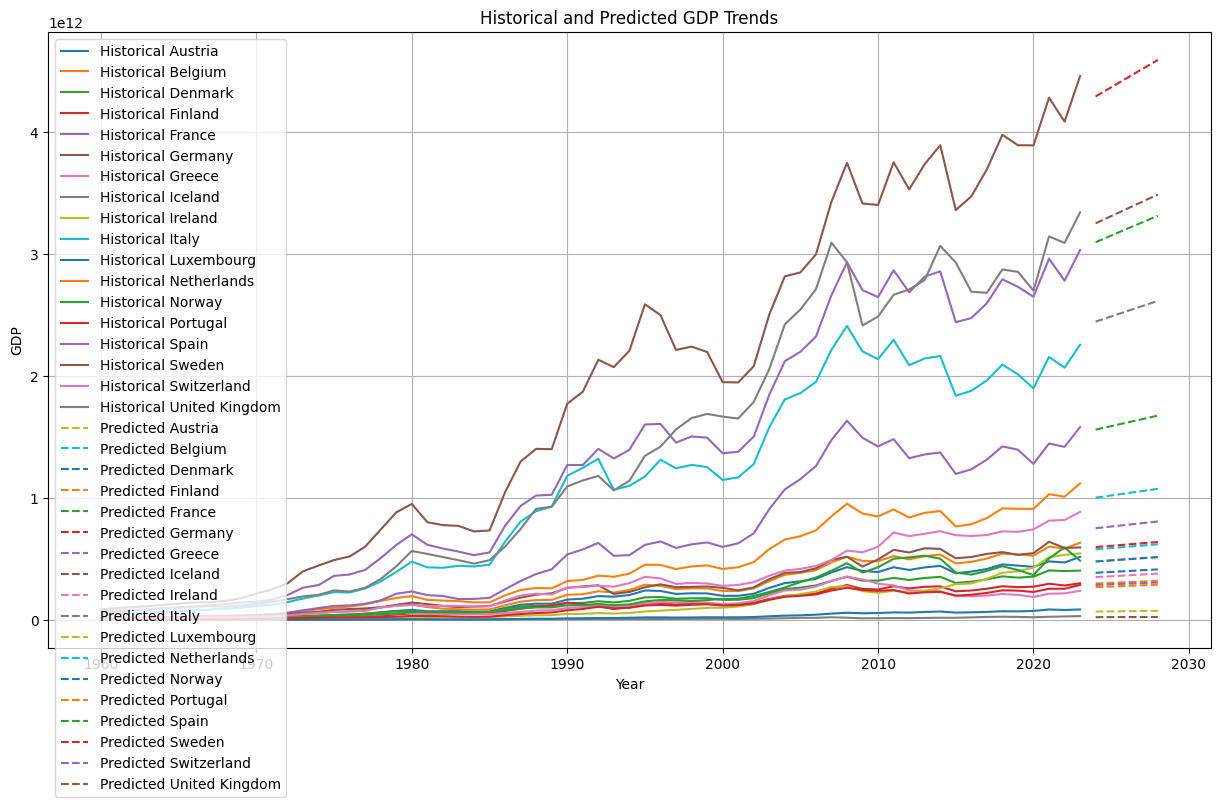

In [ ]:
# 2. Visualisasikan gabungan historis dan prediksi
plt.figure(figsize=(15, 8))

# Plot data historis
for country in df.columns[1:]:
    plt.plot(historical_data['Year'], historical_data[country], label=f'Historical {country}', linestyle='-')

# Plot data prediksi
for i, country in enumerate(future_gdp.columns):
    plt.plot(future_data['Year'], future_data[country], label=f'Predicted {country}', linestyle='--')

# Tambahkan label dan legenda
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Historical and Predicted GDP Trends')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_hasil = pd.read_csv('predicted_gdp.csv')
print(df_hasil)

   Unnamed: 0       Austria       Belgium       Denmark       Finland  \
0        2024  4.794118e+11  5.782042e+11  3.862775e+11  2.985258e+11   
1        2025  4.881191e+11  5.885491e+11  3.932081e+11  3.038533e+11   
2        2026  4.968264e+11  5.988941e+11  4.001387e+11  3.091808e+11   
3        2027  5.055337e+11  6.092390e+11  4.070694e+11  3.145083e+11   
4        2028  5.142410e+11  6.195840e+11  4.140000e+11  3.198359e+11   

         France       Germany        Greece       Iceland       Ireland  \
0  3.094647e+12  4.289018e+12  2.863282e+11  2.262128e+10  3.505981e+11   
1  3.148805e+12  4.363810e+12  2.913477e+11  2.304733e+10  3.577032e+11   
2  3.202962e+12  4.438602e+12  2.963672e+11  2.347337e+10  3.648083e+11   
3  3.257119e+12  4.513394e+12  3.013867e+11  2.389941e+10  3.719133e+11   
4  3.311277e+12  4.588186e+12  3.064062e+11  2.432545e+10  3.790184e+11   

          Italy    Luxembourg   Netherlands        Norway      Portugal  \
0  2.443809e+12  6.877848e+10  1.00

In [ ]:
# Filter data untuk tahun 2023
gdp_2023 = df[df['Year'] == 2023]

# Hilangkan kolom 'Year' agar hanya GDP yang diurutkan
gdp_2023_sorted = gdp_2023.drop(columns='Year').T  # Transpose agar negara jadi index

# Tambahkan kolom GDP untuk tahun 2023
gdp_2023_sorted.columns = ['GDP_2023']
gdp_2023_sorted = gdp_2023_sorted.sort_values(by='GDP_2023', ascending=False)

# Tampilkan hasil
print(gdp_2023_sorted)


                    GDP_2023
Germany         4.456080e+12
United Kingdom  3.340030e+12
France          3.030900e+12
Italy           2.254850e+12
Spain           1.580690e+12
Netherlands     1.118120e+12
Switzerland     8.849400e+11
Belgium         6.322170e+11
Sweden          5.932680e+11
Ireland         5.456290e+11
Austria         5.160340e+11
Norway          4.855130e+11
Denmark         4.041990e+11
Finland         3.001870e+11
Portugal        2.870800e+11
Greece          2.382060e+11
Luxembourg      8.575501e+10
Iceland         3.102003e+10


<ipython-input-37-695fc27d712b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gdp_2023_sorted.index, y=gdp_2023_sorted['GDP_2023'], palette='viridis')


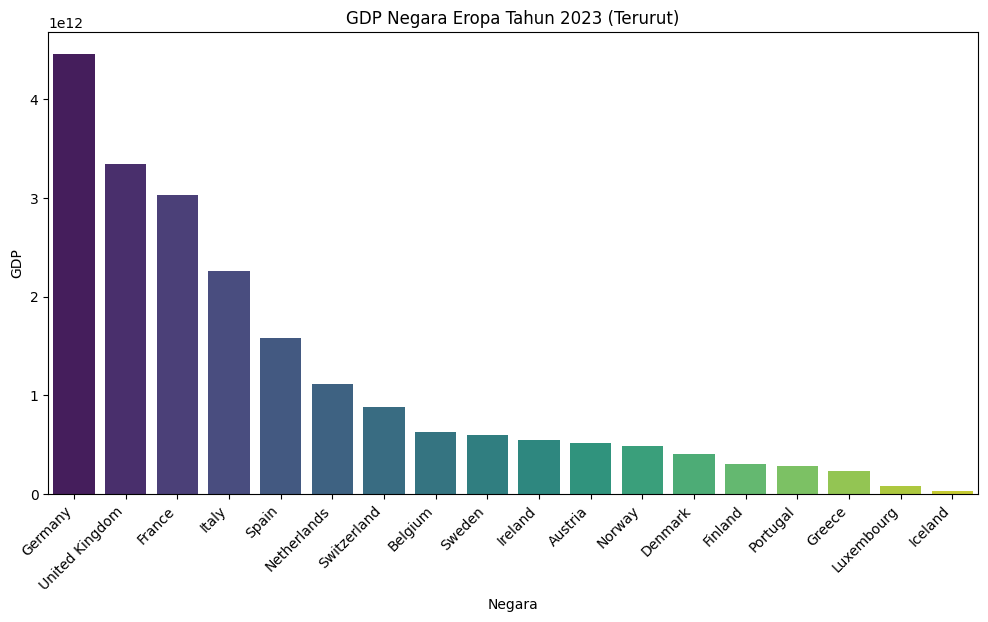

In [ ]:
# Plot GDP 2023 terurut
plt.figure(figsize=(12, 6))
sns.barplot(x=gdp_2023_sorted.index, y=gdp_2023_sorted['GDP_2023'], palette='viridis')

# Tambahkan label dan judul
plt.xticks(rotation=45, ha='right')
plt.title('GDP Negara Eropa Tahun 2023 (Terurut)')
plt.xlabel('Negara')
plt.ylabel('GDP')
plt.show()
